В этой лекции начнём большую тему "Визуализация данных".
Для визуализации данных обычно используют три основных инструмента:
    - Библиотеку Matplotlib - это самая распространённая библиотека для построения графиков в Python;
    - Библиотека Seabor - тоже очень популярная библиотека, более простой синтаксис при написание комманд. Может работать 
      как в комбинации с Matplotlib, так и самостоятельно.
    - Библиотека Plotly - это штука довольно тербовательная к ресурсам компьютера, но зато позволяет быстро строить красивые динамические графики.
    
Помимо этого, библиотека Pandas позволяет строить простые гарфики без использования дополнительных библиотека (на самом деле в она использует ядро библиотеки matplotlib, но в ограниченном виде). Они не очень подходят для создания "красивых" отчётов, но зато позволяют быстро визуализировать, например, основные статистики.

Давайте с Pandas и начнём.
Импортируем библиотеку и наши данные.

In [1]:
import pandas as pd

data = pd.read_csv("D:\\new_data\\Metro_Interstate_Traffic_Volume.csv")
data.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


Общий принцип построения графиков такой, мы выбираем данные, по которым хотим построить график и затем выбираем тип графика. Давайте посмотрим на график температуры. 

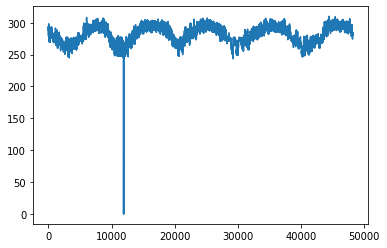

In [2]:
data['temp'].plot()

На этом графике по оси X у нас индексы или номер строк DataFrame, а по оси Y - значения колонки "temp" (температура в Келвинах).
Для начала, давайте изменим размер графика, чтобы было удобнее его читать. Делатеся это с помощью параметра figsize, в который нужно передать длинну и высоту окна.

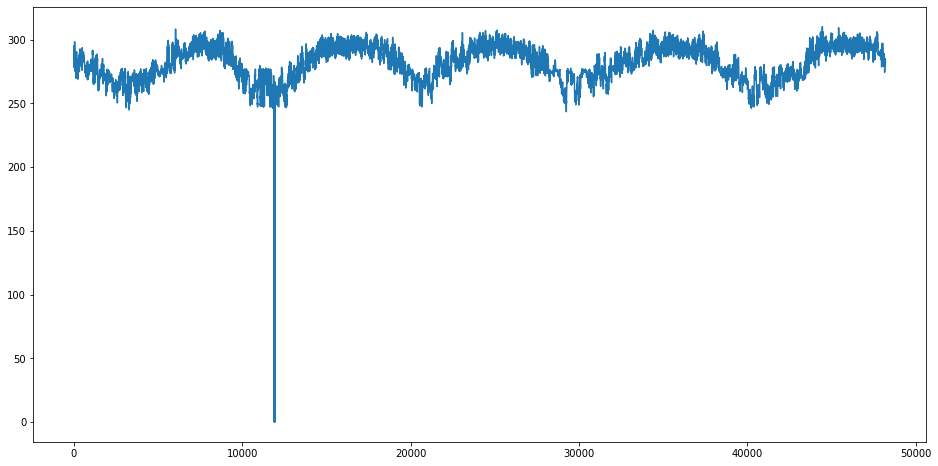

In [3]:
data['temp'].plot(figsize=(16, 8))

Какую полезную информацию можно извлечь из этого графика? Во-первых, видно, что есть какая-то закономерность в изменении температуры. Если предположить, что индексы соответсвуют упорядоченному возрастанию даты и времени, то мы получим явновыраженную сезонность в графике.
Во-вторых - есть аномальное снижение температуры до 0. Поскольку температура, в данном случае, измеряется в Кельвинах, то это означет, что в какой-то промежуток времени температура на на улице упала до абсолютного нуля (-273,15 градусов Цельсия). Поскольку, это крайне маловероятно, то можно сделать вывод, что эти данные в талбице ошибочны. Если бы мы хотеле исползовать эти данные для обучения какого-нибудь алгоритма машинного обучения, то мы могли бы просто заменить эти нули, на среднее значениее температуры в тот же сезон, но из другого периода. 
Вот так просто с помощью визуализации можно отловить ошибки или аномалии в данных.

Давайте посмотрим на другие типы графиков. Посчитаем сколько и каких типов погоды встречаются в нашей таблице.

In [4]:
data['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

Для отображения такого рода информации лучше всего использовать, Barpolt. Давайте это и сделаем.

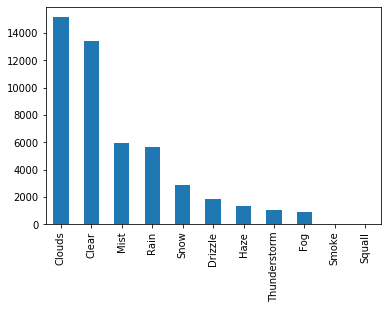

In [5]:
data['weather_main'].value_counts().plot(kind='bar')

Всё, что мы сделали - это передали ключевое слово 'bar' (тип графика) в параметр kind. Нежи приведён основной списко типов графиков в Pandas, доступный в данный момент:
    
  * 'bar' - вертикальный bar plot;
  * 'barh' - горизонтальный bar plot;
  * 'hist' : гистрограмма распределения выбранной велечины;
  * 'box' : boxplot или ящик с усами;
  * 'kde' или 'density' : графики плотности распредления некоторой величины (пока он нам не особо нужен);
  * 'area' : закрашывает грфики под кривой (по-сути график площади);
  * 'pie' : всеми любимый график-пирог или круговая диаграмма;
  * 'scatter' : отображает зависимость одной величины от другой;
  * 'hexbin' : навороченный scatter.
  
Давайте попробуем построить каждый из них. Для начала попробуем построить горизонтальный бар плот (ключевое слово 'barh') и для
лучшей читабельности увеличим размер окна графика.

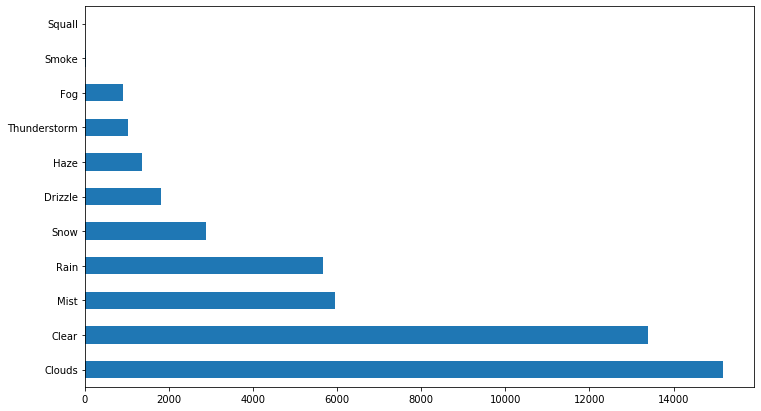

In [6]:
data['weather_main'].value_counts().plot(kind='barh', figsize=(12, 7))

Теперь давайте посмотрим, как распределеются значения колонки "traffic_voliume", т.е. построим гистограмму распределения (ключевое слово 'hist').

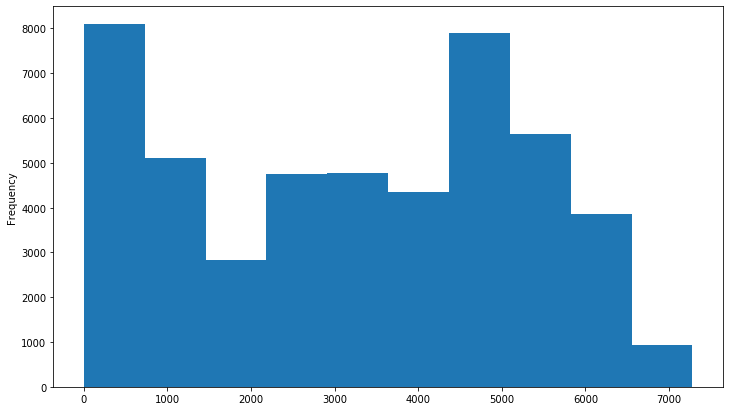

In [7]:
data['traffic_volume'].plot(kind='hist', figsize=(12, 7))

Мда. Получилось не очень информативно, т.к данные разбиты на слишком крупные секциии или группы (на графике их 10). То есть, каждая группа или прямоугольник содержит информацию  примерно 4820 наблюдений (48204 разделить на 10). Но у графика гистограмма есть такой параметр как "bins", который отвечает за количество групп. Давайте передадим его в качестве аргумента в метод plot() и установим значение равное 200.

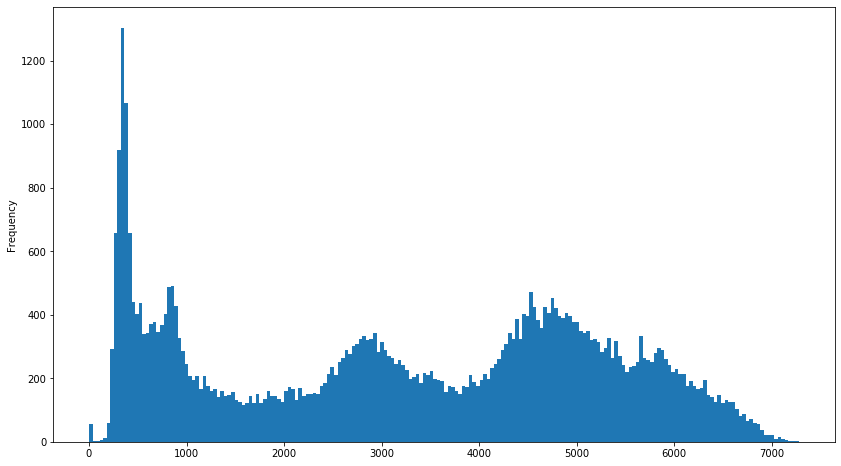

In [8]:
data['traffic_volume'].plot(kind='hist', bins=200, figsize=(14, 8))

Неправдали, совсем другая картина. Теперь у нас только четыре явновыраженных пика и мы уверенно можем сказать, что распределение этой велечины далеко от нормального распределения.

Посмотрим на те же самые данные но уже на графике бокс-плот.

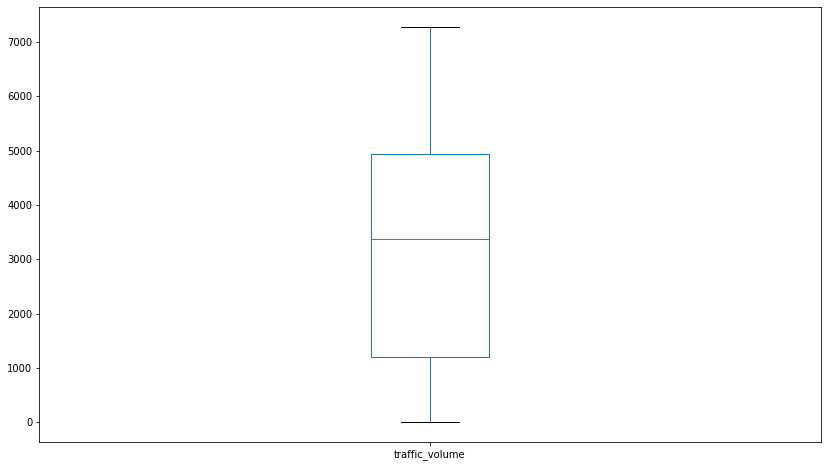

In [9]:
data['traffic_volume'].plot(kind='box', figsize=(14, 8))

Чем полезен график бокс-плот, как его читать и какую информацию о данных можно извлечть с помощьюу этого графика, мы поговорим в курсе "Основы статистики". Если кратко, то график box-plot позволяет оценить распределение велечин относительно кврантилей, так же увидеть явные выбросы.

Типы графиков 'kde', 'density' и 'area' пока пропустим. Сейчас они не представляют особого интереса. 
А вот на 'pie' и 'scatter' взглянем.

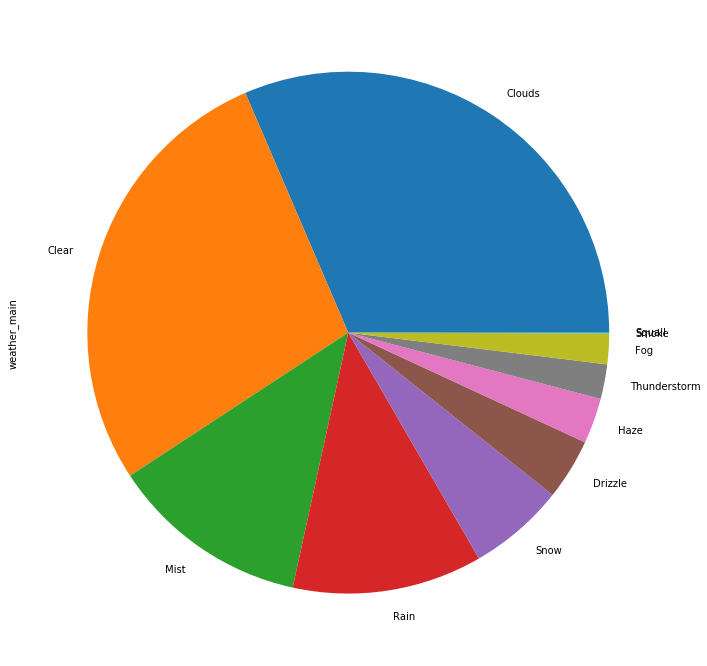

In [29]:
data['weather_main'].value_counts().plot(kind='pie', figsize=(12, 12))

Выгод графика "pie" в том, что он наглядно представляет данные. Например, тут, при одном взгляде на график ясно, что для этого региона характерна в основном солнечная и облачная погода.

График "scatter" позволяет посмотреть распределение велечин между двумя столбцами. Для того, чтобы построить scatterplot, неободио передать в качестве параметров ось "x" и ось "y". Давайте по оси "x" отложим значения колонки "temp", а по оси "y" значения колонки "traffic_volume". Из общей таблицы возьмём первые 6000 значений.

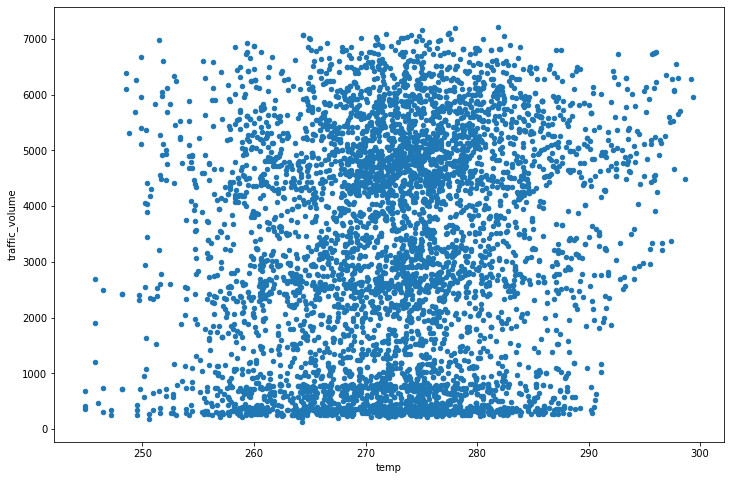

In [30]:
data.iloc[:6000, :].plot(kind="scatter", x='temp', y='traffic_volume', figsize=(12, 8))

С натяжкой можно сказать, что большинство наблюдений в данном случае сконцентриованы в трёх областях. График scatterplot бывает полезен, например, когда мы хотим посмотрим, есть ли какие-либо ярок выраженные корреляции между признаками (столбцами) в DataFrame.

Давайте теперь посмотрим, как мы можем построить те же самые графики, но только явно вызвав библиотеку matplotlib. Ипортируем библиотеку и сразу же построим обычный линейный график.

Text(0, 0.5, 'Teplota')

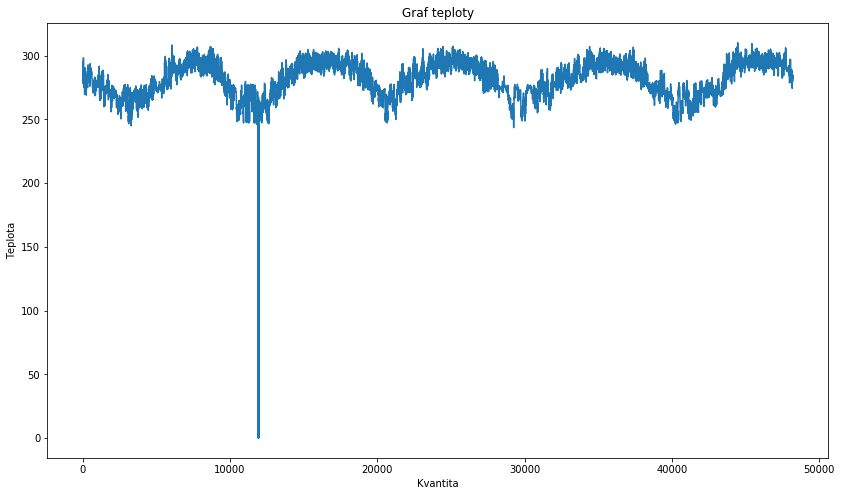

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(data['temp'])

plt.title('Graf teploty')
plt.xlabel('Kvantita')
plt.ylabel('Teplota')

После импорта библиотеки мы, установили размер окна, в котором будет отображён графикю. Это делать не обязательно, но бывает полезно, т.к. по умолчанию размер окна небольшой. Затем нарисовали график, передва в качестве аргуманта колонку "temp". Потом, дали название графику и его осям.

Использование напрямую библиотеки matplotlib может быть полезно, если мы хотим построить нексколько графиков в опредлеённой позиции. Для этого неоходмо вызвать и настроить метод subplots(), где мы должны указать количество строк и столбцов, которые будет содержадть наш макрографик. Метод plt.subplots возвращает два елемента: первый сам объект группы окон (он нас не интересует); и второй - массив из отдельных элементов (каждый элемент в котором - это одино окно). Логика простая: мы вибираем нужное нам окно и строим в нём график. Нумерация и по горизнотали и по вертикали начинаеться с нуля. 

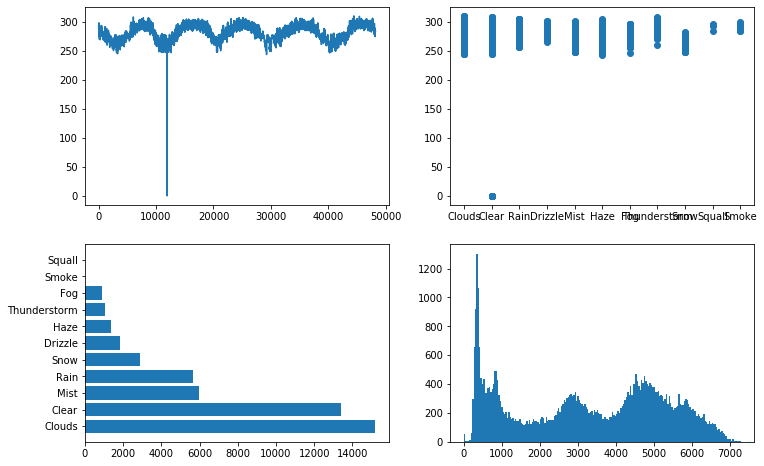

In [292]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes[0][0].plot(data['temp'])
axes[0][1].scatter(x='weather_main', y='temp',data=data)
axes[1][0].barh(data['weather_main'].value_counts().index, data['weather_main'].value_counts().values)
axes[1][1].hist(data['traffic_volume'], bins=200)

plt.show()

У библиотеки matplotlib есть ряд дополнительных интересных методов. Например, с помощью неё можно просматривать фотографии.
Или правельнее сказать, преобразовывать цифровое представление объекта в изображение. Для этого используеться метод imshow().
Давайте сгенерируем матрицу случайных шумов и отобразим её. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


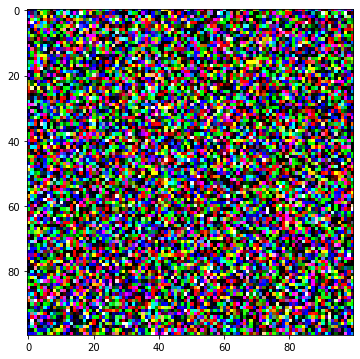

In [123]:
import numpy as np

plt.figure(figsize=(6, 6))
arr1 = np.random.randn(100, 100, 3)

plt.imshow(arr1)

Давайте теперь посмотрим на библиотеку seborn. С помощью неё можно строить те же графики красивее и иногда быстрее.
Основые графики библиотеки seaborn это:

- pairplot - тот же scatterplot для пар колонок
- distplot - гистограмма
- boxplot 
- jointplot - зависимость двух велечин и их распределение 
- heatmap - тепловая карта
- countplot - количесвто элементов для каждого уникального значения
- violinplot - экзотический вариант boxplot
- kdeplot - графики плотности распредления некоторой величины 
- catplot (factorplot) - разновидность barplot (но отображает не группы, а отдельные элементы)

Давате их построим и посмотрим на них.

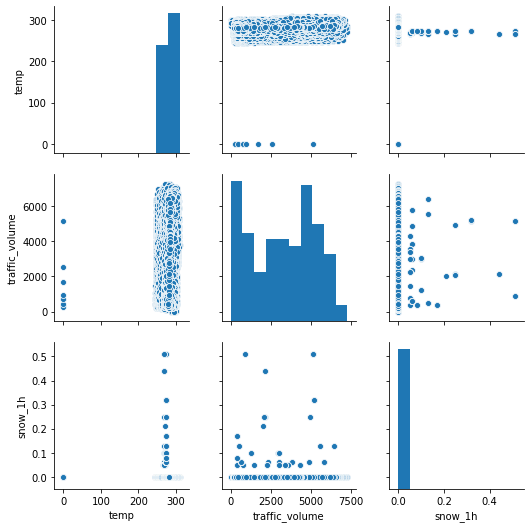

In [149]:
import seaborn as sns
sns.pairplot(data[['temp', 'traffic_volume','snow_1h']])

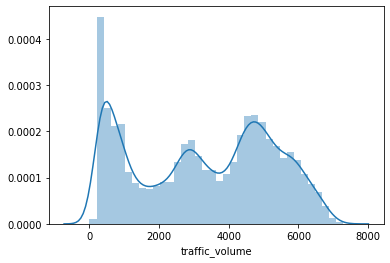

In [154]:
sns.distplot(data['traffic_volume'])

Если сравнить с графиком распределения, который строил matplotlib, то видно, что в seaborn более точно передаёт действилеьный 
характер распределения.

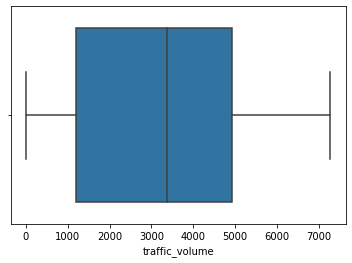

In [159]:
sns.boxplot(data['traffic_volume'])

В seaborn мы можем легко построить грфик boxplot одной величины, сгруппировоной по другой. Например, давайте построим boxplot 
для значений "traffic_volume", сгруппированых по колонке "weather_main".

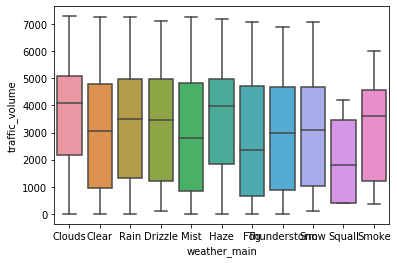

In [169]:
sns.boxplot(x='weather_main', y='traffic_volume', data=data)

Просто, правда. Единственное, что не очень хорошо видно названия категорий. Лучше разместить их по диагонили, чтобы было проще прочитать.

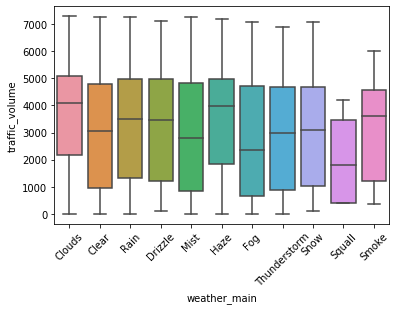

In [186]:
sns.boxplot(x='weather_main', y='traffic_volume', data=data)
plt.xticks(rotation=45)
plt.show()

Для разварота значений оси X мы использовали метод из библиотеки matplotlib. Библиотеки matplolib и seaborn отлично взаимодействуют друг с дргом. Иногда, это бывает удобно. Давайте построим несколько графиков из библиотеки seaborn группой.
То есть, создадим шаблон из 4 окон и расположим там графики  countplot, violinplot, catplot и kde.

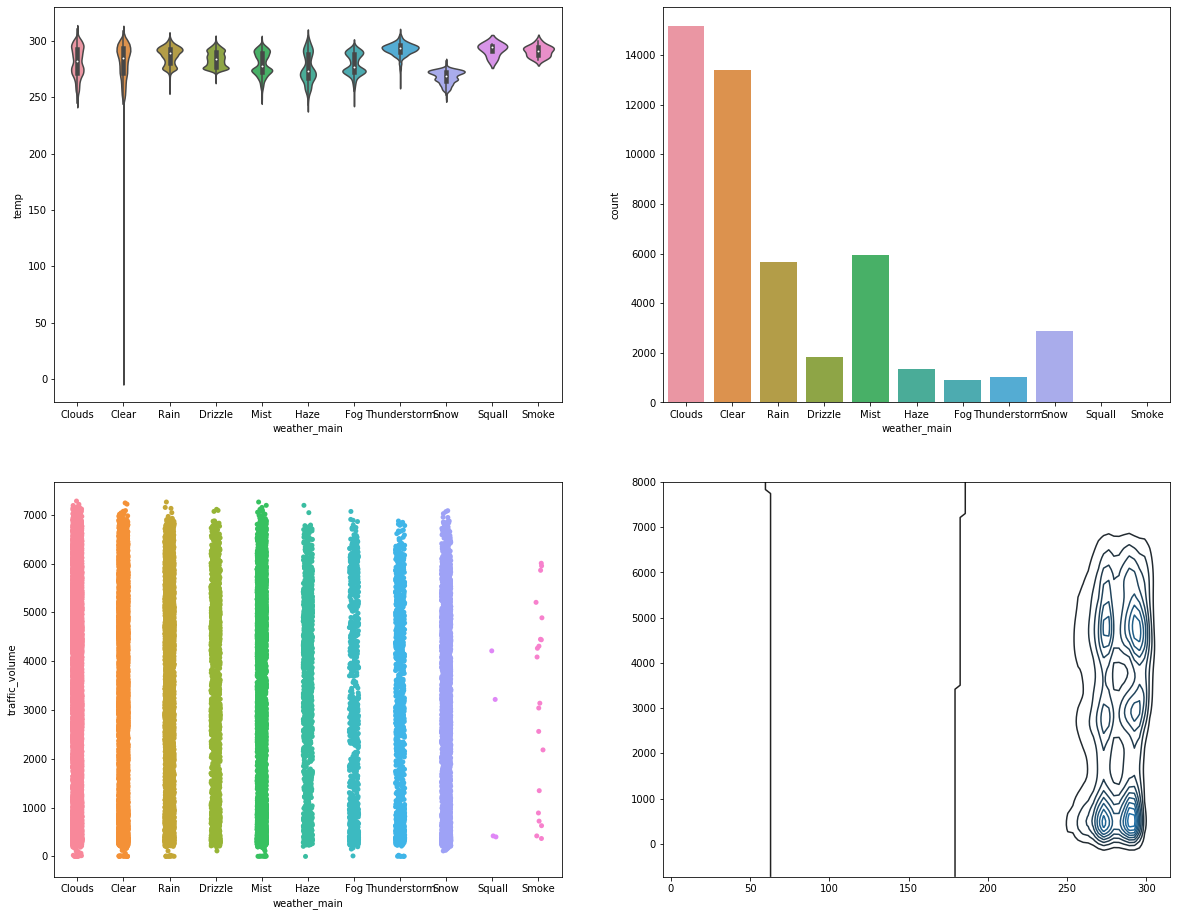

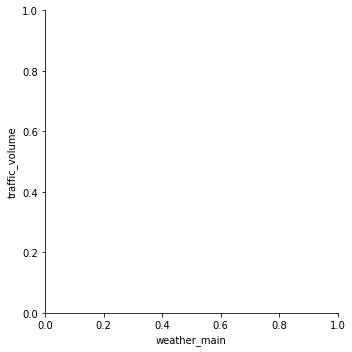

In [253]:
_, axes = plt.subplots(2, 2, figsize=(20, 16))

sns.violinplot(x='weather_main', y='temp', data=data, ax=axes[0][0])
sns.countplot(x='weather_main', data=data, ax=axes[0][1])
sns.catplot(x='weather_main', y='traffic_volume', data=data, ax=axes[1][0])
sns.kdeplot(data[['temp', 'traffic_volume']], ax=axes[1][1])
plt.show()

Кстати, в seaborn есть ещё одна модификация этого графика boxplot с похожим названием - boxenplot. Он отображает ту же самую информацию, но немного более детальней. Взгляните сами.

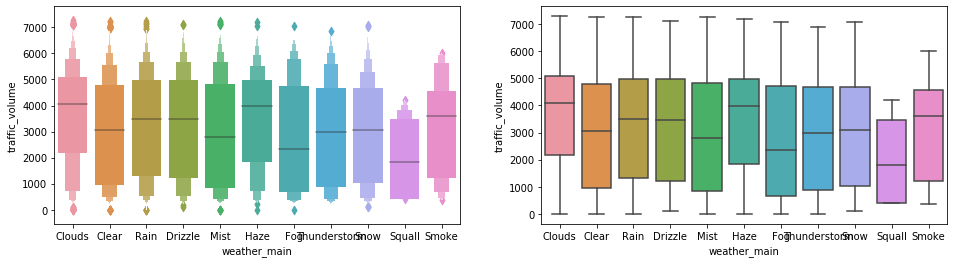

In [288]:
_, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxenplot(x='weather_main', y='traffic_volume',data=data, ax=axes[0], )
sns.boxplot(x='weather_main', y='traffic_volume',data=data, ax=axes[1])

plt.show()

На этом остановимся. В следующей лекции посмотрим на библиотеку для построения динамических графиков Plotly.